In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.svm import SVR
from functools import reduce

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
path = "Data_COMP5212project.xlsx" 

In [4]:
df_er = pd.read_excel (path, sheet_name='ER')
print(df_er)

          Date  USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
0   1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1   1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
2   1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
3   1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
4   1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030
..         ...      ...      ...      ...      ...      ...      ...      ...
261 2020-10-01   6.6927   104.64   1.1647   1.3317   0.7026   0.9167   1.2941
262 2020-11-01   6.5789   104.27   1.1928   1.3000   0.7345   0.9090   1.3321
263 2020-12-01   6.5250   103.24   1.2213   1.2730   0.7694   0.8851   1.3673
264 2021-01-01   6.4250   104.68   1.2136   1.2777   0.7642   0.8903   1.3702
265 2021-02-01   6.4730   106.58   1.2074   1.2739   0.7705   0.9082   1.3932

[266 rows x 8 columns]


In [5]:
df_er['ER_datetime']=pd.to_datetime(df_er['Date'], format='%Y%m%d', errors='raise')

In [6]:
df_er.head()

,Date,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
0,1999-01-01,8.2778,116.32,1.1366,1.5105,0.6305,1.4160,1.6458,1999-01-01
1,1999-02-01,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
2,1999-03-01,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
3,1999-04-01,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
4,1999-05-01,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01


In [7]:
df_er=df_er.drop(columns='Date')

In [8]:
df_var = pd.read_excel (path, sheet_name='Variables')
df_var['DLTINT_USEA'] = df_var['LTINT_USA'] - df_var['LTINT_EA19']

In [9]:
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351


In [10]:
df_var['Var_datetime']=pd.to_datetime(df_var['Date'], format='%Y%m%d', errors='raise')
df_var.head()

,Date,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Var_datetime
0,1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1999-01-01
1,1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1999-02-01
2,1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1999-03-01
3,1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1999-04-01
4,1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1999-05-01


In [11]:
df_var=df_var.drop(columns='Date')

In [12]:
df_var["Current_EUR_USD"] = df_er["EUR_USD"].copy()
df_var = df_var[:-1]
df_er = df_er[1:].reset_index(drop=True)
df_all = df_var.copy()
df_all[df_er.columns] = df_er

In [13]:
df_all = df_all.set_index("Var_datetime")

In [14]:
df_all.head()

,Shanghai,SP500,Nikkei225,EuroStoxx50,SPTSX,SPASX200,SMI,FT100,GoldPrice,BrentOilFutures,CPI_CHN,CPI_USA,CPI_JPN,CPI_EU,CPI_CAN,CPI_AUS,CPI_CHE,CPI_GBR,STINT_CHN,STINT_USA,STINT_JPN,STINT_EA19,STINT_CAN,STINT_AUS,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR,DLTINT_USEA,Current_EUR_USD,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,ER_datetime
Var_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-01,1134.67,1279.64,14499.25,NaN,6729.56,2781.7,7201.2,NaN,286.3,11.35,71.07864,69.31992,99.9,NaN,72.29391,62.96726,91.35076,71.8,4.59,4.89,NaN,3.1321,5.004500,4.79,1.27167,5.92171,NaN,4.72,1.910,3.8220,4.946500,5.127895,2.555,4.2868,0.8980,1.1366,8.2790,119.17,1.1025,1.5080,0.6188,1.4463,1.6030,1999-02-01
1999-02-01,1090.09,1238.33,14367.54,NaN,6312.69,2768.4,7063.8,NaN,287.5,10.88,71.35999,69.40430,99.5,NaN,72.37292,62.96726,91.65951,71.9,4.59,4.90,NaN,3.0934,5.033500,4.77,1.26167,5.53197,NaN,5.00,2.117,3.9742,5.124000,5.300000,2.550,4.4319,1.0258,1.1025,8.2800,118.86,1.0770,1.5080,0.6347,1.4825,1.6107,1999-03-01
1999-03-01,1158.05,1286.37,15836.59,NaN,6597.79,2867.0,7130.2,NaN,279.8,15.24,71.00346,69.61526,99.6,NaN,72.68896,62.96726,91.75533,72.3,4.59,4.91,NaN,3.0467,5.057391,4.81,1.24833,5.42287,NaN,5.23,1.816,4.1810,5.220435,5.526522,2.604,4.6554,1.0490,1.0770,8.2790,119.49,1.0570,1.4565,0.6615,1.5255,1.6095,1999-04-01
1999-04-01,1120.93,1335.18,16701.53,NaN,7014.70,3027.8,7335.5,NaN,286.8,16.57,70.65607,70.12155,100.1,NaN,73.08401,63.24588,91.90840,72.6,4.59,4.88,NaN,2.6965,4.716667,4.76,0.99333,5.31773,NaN,5.18,1.563,4.0407,5.029524,5.357500,2.534,4.5920,1.1393,1.0570,8.2784,121.52,1.0423,1.4739,0.6488,1.5272,1.6030,1999-05-01
1999-05-01,1279.33,1301.84,16111.65,NaN,6841.80,2831.9,6911.6,NaN,270.4,15.20,69.95301,70.12155,100.1,NaN,73.24203,63.24588,91.70221,72.8,4.59,4.92,NaN,2.5790,4.615500,4.86,1.02333,5.34875,NaN,5.54,1.334,4.2049,5.359500,5.875714,2.720,4.9068,1.3351,1.0423,8.2787,121.04,1.0357,1.4623,0.6683,1.5480,1.5775,1999-06-01


In [15]:
df_all.to_csv("df_all.csv",index=False) ##Export the data for future use

In [16]:
#to use the columns related to USD and EU
df_usdeu=df_all[['EUR_USD', 'SP500', 'EuroStoxx50','GoldPrice', 'BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19', 'DLTINT_USEA', 'Current_EUR_USD']]

In [17]:
df_usdeu.head()

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
Var_datetime,,,,,,,,,,,,,
1999-01-01,1.1025,1279.64,NaN,286.3,11.35,69.31992,NaN,4.89,3.1321,4.72,3.8220,0.8980,1.1366
1999-02-01,1.0770,1238.33,NaN,287.5,10.88,69.40430,NaN,4.90,3.0934,5.00,3.9742,1.0258,1.1025
1999-03-01,1.0570,1286.37,NaN,279.8,15.24,69.61526,NaN,4.91,3.0467,5.23,4.1810,1.0490,1.0770
1999-04-01,1.0423,1335.18,NaN,286.8,16.57,70.12155,NaN,4.88,2.6965,5.18,4.0407,1.1393,1.0570
1999-05-01,1.0357,1301.84,NaN,270.4,15.20,70.12155,NaN,4.92,2.5790,5.54,4.2049,1.3351,1.0423


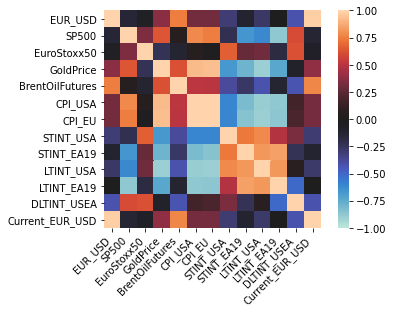

In [18]:
#correlation heat map

corr_usdeu = df_usdeu.corr()
ax = sns.heatmap(
    corr_usdeu, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [19]:
df_usdeu.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_usdeu

,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,LTINT_EA19,DLTINT_USEA,Current_EUR_USD
Var_datetime,,,,,,,,,,,,,
2003-09-01,1.1584,995.97,2395.87,385.4,27.61,78.13786,79.88,1.08,2.1473,4.27,4.2319,0.0381,1.1660
2003-10-01,1.1994,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584
2003-11-01,1.2588,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994
2003-12-01,1.2469,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588
2004-01-01,1.2490,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,1.1647,3363.00,3193.61,1907.8,40.95,109.81490,105.73,0.13,-0.4914,0.68,0.1230,0.5570,1.1718
2020-10-01,1.1928,3269.96,2958.21,1892.4,37.46,109.86050,105.92,0.12,-0.5091,0.79,0.0005,0.7895,1.1647
2020-11-01,1.2213,3621.63,3492.54,1784.8,47.59,109.79340,105.63,0.16,-0.5209,0.87,-0.0553,0.9253,1.1928


In [21]:
usdeu_y=df_usdeu['EUR_USD']
usdeu_x=df_usdeu.drop('EUR_USD', axis=1)

#### XGBoost

In [22]:
import xgboost as xgb

[12:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.02 degrees.
MAE: 0.019958162059481192
MSE: 0.0008069994935147446
RMSE: 0.028407736508119483
R-squared:  0.9507903376670273
Accuracy: 98.44 %.


Text(0, 0.5, 'Predictions')

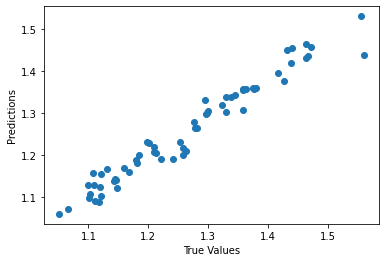

In [23]:
usdeu_x_train, usdeu_x_valid, usdeu_y_train, usdeu_y_valid = train_test_split(usdeu_x, usdeu_y, test_size = 0.3, random_state=15)

xgb_reg = xgb.XGBRegressor(n_estimators=2000, 
                               max_depth=3,
                               learning_rate=0.1,
                               reg_alpha=0.3,
                               reg_lambda=0.3,
                               subsample=0.6,
                               random_state=38)

xgb_reg.fit(usdeu_x_train, usdeu_y_train) 

# Use the forest's predict method on the test data
predictions = xgb_reg.predict(usdeu_x_valid)
# Calculate the absolute errors
errors = abs(predictions - usdeu_y_valid)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu_y_valid, predictions))
print('MSE:', metrics.mean_squared_error(usdeu_y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_valid, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu_y_valid, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

plt.scatter(usdeu_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Deep Learning

In [24]:
df_usdeu_12m = pd.DataFrame()
for i in range(12):
    df_usdeu_12m[list(map(lambda x: "{}th".format(i+1)+x, df_usdeu.drop("EUR_USD", axis=1).columns))] = df_usdeu.shift(-i).drop("EUR_USD", axis=1)
df_usdeu_12m = df_usdeu_12m.dropna()

In [25]:
df_usdeu_12m

,1thSP500,1thEuroStoxx50,1thGoldPrice,1thBrentOilFutures,1thCPI_USA,1thCPI_EU,1thSTINT_USA,1thSTINT_EA19,1thLTINT_USA,1thLTINT_EA19,1thDLTINT_USEA,1thCurrent_EUR_USD,2thSP500,2thEuroStoxx50,2thGoldPrice,2thBrentOilFutures,2thCPI_USA,2thCPI_EU,2thSTINT_USA,2thSTINT_EA19,2thLTINT_USA,2thLTINT_EA19,2thDLTINT_USEA,2thCurrent_EUR_USD,3thSP500,3thEuroStoxx50,3thGoldPrice,3thBrentOilFutures,3thCPI_USA,3thCPI_EU,3thSTINT_USA,3thSTINT_EA19,3thLTINT_USA,3thLTINT_EA19,3thDLTINT_USEA,3thCurrent_EUR_USD,4thSP500,4thEuroStoxx50,4thGoldPrice,4thBrentOilFutures,...,9thLTINT_USA,9thLTINT_EA19,9thDLTINT_USEA,9thCurrent_EUR_USD,10thSP500,10thEuroStoxx50,10thGoldPrice,10thBrentOilFutures,10thCPI_USA,10thCPI_EU,10thSTINT_USA,10thSTINT_EA19,10thLTINT_USA,10thLTINT_EA19,10thDLTINT_USEA,10thCurrent_EUR_USD,11thSP500,11thEuroStoxx50,11thGoldPrice,11thBrentOilFutures,11thCPI_USA,11thCPI_EU,11thSTINT_USA,11thSTINT_EA19,11thLTINT_USA,11thLTINT_EA19,11thDLTINT_USEA,11thCurrent_EUR_USD,12thSP500,12thEuroStoxx50,12thGoldPrice,12thBrentOilFutures,12thCPI_USA,12thCPI_EU,12thSTINT_USA,12thSTINT_EA19,12thLTINT_USA,12thLTINT_EA19,12thDLTINT_USEA,12thCurrent_EUR_USD
Var_datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-09-01,995.97,2395.87,385.4,27.61,78.13786,79.88,1.08,2.1473,4.27,4.2319,0.0381,1.1660,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,...,4.72,4.3862,0.3338,1.2186,1140.84,2811.08,392.6,34.50,80.03645,81.75,1.46,2.1127,4.73,4.4426,0.2874,1.2187,1101.72,2720.05,391.0,40.03,79.90988,81.62,1.57,2.1160,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188
2003-10-01,1050.71,2575.04,384.5,27.70,78.05347,80.03,1.10,2.1436,4.29,4.3081,-0.0181,1.1584,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,...,4.73,4.4426,0.2874,1.2187,1101.72,2720.05,391.0,40.03,79.90988,81.62,1.57,2.1160,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432
2003-11-01,1058.20,2630.47,396.8,28.45,77.84251,80.11,1.11,2.1590,4.30,4.4378,-0.1378,1.1994,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,...,4.50,4.3396,0.1604,1.2020,1104.24,2670.79,410.4,39.61,79.95207,81.74,1.68,2.1143,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785
2003-12-01,1111.92,2760.66,415.7,30.17,77.75813,80.36,1.10,2.1463,4.27,4.3560,-0.0860,1.2588,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490,1126.21,2787.49,427.3,31.51,...,4.28,4.1679,0.1121,1.2188,1114.58,2726.30,418.7,46.38,80.12083,81.86,1.86,2.1186,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785,1173.82,2876.39,451.3,45.51,80.58494,82.15,2.26,2.1703,4.19,3.8687,0.3213,1.3293
2004-01-01,1131.13,2839.13,402.2,29.18,78.13786,80.30,1.06,2.0895,4.15,4.2567,-0.1067,1.2469,1144.94,2893.18,396.4,32.23,78.55977,80.50,1.05,2.0705,4.08,4.1833,-0.1033,1.2490,1126.21,2787.49,427.3,31.51,79.06606,80.98,1.05,2.0288,3.83,4.0194,-0.1894,1.2315,1107.30,2787.48,387.0,34.48,...,4.13,4.1140,0.0160,1.2432,1130.20,2811.72,428.5,48.98,80.54275,82.20,2.04,2.1473,4.10,3.9794,0.1206,1.2785,1173.82,2876.39,451.3,45.51,80.58494,82.15,2.26,2.1703,4.19,3.8687,0.3213,1.3293,1211.92,2951.01,437.5,40.46,80.28960,82.43,2.45,2.1

In [26]:
usdeu_12m_x = df_usdeu_12m
usdeu_12m_y = df_usdeu["EUR_USD"]["2004-08-01":]

In [27]:
usdeu_12m_y

Var_datetime
2004-08-01    1.2432
2004-09-01    1.2785
2004-10-01    1.3293
2004-11-01    1.3558
2004-12-01    1.3034
               ...  
2020-09-01    1.1647
2020-10-01    1.1928
2020-11-01    1.2213
2020-12-01    1.2136
2021-01-01    1.2074
Name: EUR_USD, Length: 198, dtype: float64

In [28]:
import torch
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils import weight_norm
import random
torch.use_deterministic_algorithms(True) ## For Reproducibility

In [29]:
class DataSet(Dataset):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        self.len = len(x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx], self.z[idx]
      
    def __len__(self):
        return self.len

class MSE_Sim_loss(torch.nn.Module):
    def __init__(self, alpha=1, beta=1):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.alpha = alpha
        self.beta = beta

    def forward(self, pred, y_true, current):
        true_diff = y_true.view(-1) - current.view(-1)
        pred_diff = pred.view(-1) - current.view(-1)
        similarity = true_diff.dot(pred_diff)/(torch.norm(true_diff)*torch.norm(pred_diff))
        MSEloss = torch.nn.L1Loss().to(self.device)
        return self.alpha*MSEloss(pred, y_true) + self.beta*(1 - similarity)


class LSTM_model(torch.nn.Module):
    def __init__(self, input_size=12, hidden_size=12, num_layers=3, middle_feature=20, seed=None):
        super().__init__()
        if seed != None:
            torch.manual_seed(seed)
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, )
        self.linear = torch.nn.Linear(in_features=12*hidden_size, out_features=middle_feature)
        self.outlayer = torch.nn.Linear(in_features=middle_feature, out_features=1)
        self.normlayer = torch.nn.InstanceNorm1d(12)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []
    
    def forward(self, x):
        x, (hn, cn) = self.lstm(x)
        x = self.normlayer(x)
        x = F.relu(x)
        x = x.reshape(x.shape[0], -1)
        x = self.linear(x)
        x = F.relu(x)
        x = self.outlayer(x)
        return x

    def fit(self, x, y, z, epochs=20, lr=0.001, alpha=1, beta=1, batch_size=None, shuffle=True):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 12, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 12, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1,12,12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        if isinstance(z, pd.DataFrame) or isinstance(z, pd.Series):
            z = torch.from_numpy(z.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(z, np.ndarray):
            z = torch.from_numpy(z.reshape(-1, 1)).float().to(self.device)
        else:
            z = torch.tensor(z).view(-1, 1).float().to(self.device)
        if batch_size == None:
            batch_size = len(x)//10
        dataset = DataSet(x,y,z)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
        lossfn = MSE_Sim_loss(alpha=alpha, beta=beta)
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        i = 0
        for i in range(epochs):
            epoch_loss = []
            for x, y, z in dataloader:
                optimizer.zero_grad()
                pred = self.forward(x)
                l = lossfn(pred, y, z)
                l.backward()
                epoch_loss.append(l.item())
                optimizer.step()
                
            print("loss: ", sum(epoch_loss)/len(epoch_loss))
            self.loss_hist.append(sum(epoch_loss)/len(epoch_loss))
            self.state_dict_hist.append(self.state_dict())
            
    
    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return 
    
    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 12, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 12, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1,12,12).float().to(self.device)
        
        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

loss:  1.9618701501326128
loss:  1.3539239059795032
loss:  0.940622167153792
loss:  0.8281055092811584
loss:  0.7709890062158758
loss:  0.7269225391474637
loss:  0.6687470430677588
loss:  0.6913549412380565
loss:  0.6006348471749913
loss:  0.6052460697564211
loss:  0.5685841549526561
loss:  0.5849452953446995
loss:  0.5791948952458121
loss:  0.5647861171852459
loss:  0.500753949988972
loss:  0.5451622984626077
loss:  0.5608672797679901
loss:  0.49395842172882776
loss:  0.3993324488401413
loss:  0.420472038063136
Mean Absolute Error: 0.05 degrees.
MAE: 0.04713295965512594
MSE: 0.004048028609024227
RMSE: 0.06362411971119307
R-squared:  0.7430918474748458
Accuracy: 96.28 %.


Text(0, 0.5, 'Predictions')

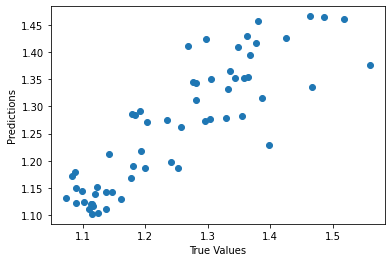

In [30]:
usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_12m_x, usdeu_12m_y, test_size = 0.3, random_state=3)
current = usdeu12m_x_train["12thCurrent_EUR_USD"]
lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
lstm_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.00001)
lstm_model.load_best_state_dict()
predictions = lstm_model.predict(usdeu12m_x_valid)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_valid)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('MAE:', metrics.mean_absolute_error(usdeu12m_y_valid, predictions))
print('MSE:', metrics.mean_squared_error(usdeu12m_y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu12m_y_valid, predictions)))
print ('R-squared: ',metrics.r2_score(usdeu12m_y_valid, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### TCNN

In [31]:
usdeu_t_12m_x = usdeu_12m_x[["{}th".format(i+1) + "Current_EUR_USD" for i in range(12)]]

In [32]:
class Temporal_block(torch.nn.Module):
    def __init__(self, dilation_size):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.padding = torch.nn.ConstantPad1d((dilation_size*2,0),0)
        self.conv1d_1 = weight_norm(torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=dilation_size))
        self.conv1d_2 = weight_norm(torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, dilation=dilation_size))

    def forward(self, x):
        out = self.conv1d_1(x)
        out = F.relu(self.padding(out))
        out = self.conv1d_2(out)
        out = F.relu(self.padding(out))
        return F.relu(out+x)


class TCNN(torch.nn.Module):
    def __init__(self, seed=None):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        if seed != None:
          torch.manual_seed(seed)
        
        self.temp_block_d1 = Temporal_block(dilation_size=1)
        self.temp_block_d2 = Temporal_block(dilation_size=2)
        self.temp_block_d4 = Temporal_block(dilation_size=4)
        self.linear = torch.nn.Linear(12, 1)
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []

    def forward(self, x):
        x = self.temp_block_d1(x)
        x = self.temp_block_d2(x)
        x = self.temp_block_d4(x)
        x = x.view(x.shape[0],-1)
        x = F.relu(self.linear(x))
        return x

    def fit(self, x, y, z,epochs=20, lr=0.001, alpha=1, beta=1,  batch_size=None, shuffle=True):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        if isinstance(z, pd.DataFrame) or isinstance(z, pd.Series):
            z = torch.from_numpy(z.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(z, np.ndarray):
            z = torch.from_numpy(z.reshape(-1, 1)).float().to(self.device)
        else:
            z = torch.tensor(z).view(-1, 1).float().to(self.device)
        
        if batch_size == None:
            batch_size = len(x)//10
        lossfn = MSE_Sim_loss(alpha=alpha, beta=beta)
        optimizer = torch.optim.RMSprop(self.parameters(), lr=lr)
        dataset = DataSet(x,y,z)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
        i = 0
        for i in range(epochs):
            epoch_loss = []
            for x, y, z in dataloader:
                optimizer.zero_grad()
                pred = self.forward(x)
                l = lossfn(pred, y, z)
                l.backward()
                epoch_loss.append(l.item())
                optimizer.step()
           
            print("loss: ", sum(epoch_loss)/len(epoch_loss))
            self.loss_hist.append(sum(epoch_loss)/len(epoch_loss))
            self.state_dict_hist.append(self.state_dict())
      
    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        
        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return 

loss:  1.5712929259647022
loss:  1.1670063517310403
loss:  1.0836071101101963
loss:  1.018428092653101
loss:  1.0510119551962072
loss:  0.9941169186071916
loss:  1.0510415434837341
loss:  1.1096512350169094
loss:  1.0482576326890425
loss:  1.0179675600745461
loss:  1.0416060902855613
loss:  1.1036392829634927
loss:  1.0149746591394597
loss:  1.0354148881001906
loss:  1.0723427967591719
loss:  1.0329817750237205
loss:  1.0415297042239795
loss:  1.032030994241888
loss:  1.0308351516723633
loss:  0.976617840203372
[1.4103366 1.2808372 1.2912608 1.1277653 1.3300388 1.1444753 1.2714794
 1.101207  1.2194294 1.4556919 1.1696074 1.41263   1.2761849 1.2747768
 1.1691997 1.2655538 1.3547875 1.251942  1.1441678 1.1170577 1.1867933
 1.2020661 1.208103  1.1609153 1.1344509 1.2208631 1.2978045 1.1927634
 1.2793403 1.4639416 1.2083474 1.2800487 1.315328  1.259511  1.2931669
 1.2102022 1.3724949 1.3011495 1.3411137 1.1443197 1.1589788 1.2480297
 1.1230536 1.2884144 1.1871215 1.1950434 1.1268684 1.1821

Text(0, 0.5, 'Predictions')

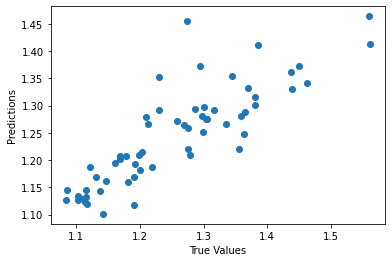

In [33]:
usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_t_12m_x, usdeu_12m_y, test_size = 0.3, random_state=35)
current = usdeu12m_x_train["12thCurrent_EUR_USD"]
TCNN_model = TCNN(seed=57)
TCNN_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.001)
#TCNN_model.load_best_state_dict()
predictions = TCNN_model.predict(usdeu12m_x_valid)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_valid)
print(predictions)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
# print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
# print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

###TCNN with attention

In [34]:
import torch.nn as nn
import math
class Temporal_block(torch.nn.Module):
    def __init__(self, dilation_size):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.padding = torch.nn.ConstantPad1d((dilation_size*2,0),0)
        self.conv1d_1 = weight_norm(torch.nn.Conv1d(in_channels=1, out_channels=12, kernel_size=3, dilation=dilation_size))
        self.conv1d_2 = weight_norm(torch.nn.Conv1d(in_channels=12, out_channels=1, kernel_size=3, dilation=dilation_size))

    def forward(self, x):
        out = self.conv1d_1(x)
        out = F.relu(self.padding(out))
        #print(out.shape)
        out = self.conv1d_2(out)
        out = F.relu(self.padding(out))
        #print(out.shape)
        return F.relu(out+x)


def masked_softmax(X, valid_lens):
    """Perform softmax operation by masking elements on the last axis."""
    # `X`: 3D tensor, `valid_lens`: 1D or 2D tensor
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # On the last axis, replace masked elements with a very large negative
        # value, whose exponentiation outputs 0
        X = d2l.sequence_mask(X.reshape(-1, shape[-1]), valid_lens,
                              value=-1e6)
        return nn.functional.softmax(X.reshape(shape), dim=-1)


class DotProductAttention(nn.Module):
    """Scaled dot product attention."""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)

    # Shape of `queries`: (`batch_size`, no. of queries, `d`)
    # Shape of `keys`: (`batch_size`, no. of key-value pairs, `d`)
    # Shape of `values`: (`batch_size`, no. of key-value pairs, value
    # dimension)
    # Shape of `valid_lens`: (`batch_size`,) or (`batch_size`, no. of queries)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        # Set `transpose_b=True` to swap the last two dimensions of `keys`
        scores = torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)


class TCNN_att(torch.nn.Module):
    def __init__(self, seed=None):
        super().__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        if seed != None:
          torch.manual_seed(seed)
        
        self.temp_block_d1 = Temporal_block(dilation_size=1)
        self.temp_block_d2 = Temporal_block(dilation_size=2)
        self.temp_block_d4 = Temporal_block(dilation_size=4)
        self.linear = torch.nn.Linear(1, 1)
        self.att = DotProductAttention(0.2)
        self.to(self.device)
        self.loss_hist = []
        self.state_dict_hist = []

    def forward(self, x):
        x = self.temp_block_d1(x)
        x = self.temp_block_d2(x)
        x = self.temp_block_d4(x)
        #print("1: ",x.shape)
        x = x.view(-1,12,1)
        x = self.att(x[:,-1:,:], x,x)
        #print("2: ",x.shape)
        #x = x.view(-1,1,-1)
        x = F.relu(self.linear(x))
        return x

    def fit(self, x, y, z,epochs=20, lr=0.001, alpha=1, beta=1,  batch_size=None, shuffle=True):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = torch.from_numpy(y.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            y = torch.from_numpy(y.reshape(-1, 1)).float().to(self.device)
        else:
            y = torch.tensor(y).view(-1, 1).float().to(self.device)
        if isinstance(z, pd.DataFrame) or isinstance(z, pd.Series):
            z = torch.from_numpy(z.values.reshape(-1, 1)).float().to(self.device)
        elif isinstance(z, np.ndarray):
            z = torch.from_numpy(z.reshape(-1, 1)).float().to(self.device)
        else:
            z = torch.tensor(z).view(-1, 1).float().to(self.device)
        
        if batch_size == None:
            batch_size = len(x)//10
        lossfn = MSE_Sim_loss(alpha=alpha, beta=beta)
        optimizer = torch.optim.RMSprop(self.parameters(), lr=lr)
        dataset = DataSet(x,y,z)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
        i = 0
        for i in range(epochs):
            epoch_loss = []
            for x, y, z in dataloader:
                optimizer.zero_grad()
                pred = self.forward(x)
                l = lossfn(pred, y, z)
                l.backward()
                epoch_loss.append(l.item())
                optimizer.step()
           
            print("loss: ", sum(epoch_loss)/len(epoch_loss))
            self.loss_hist.append(sum(epoch_loss)/len(epoch_loss))
            self.state_dict_hist.append(self.state_dict())
      
    def predict(self, x):
        if isinstance(x, pd.DataFrame) or isinstance(x, pd.Series):
            x = torch.from_numpy(x.values.reshape(-1, 1, 12)).float().to(self.device)
        elif isinstance(x, np.ndarray):
            x = torch.from_numpy(x.reshape(-1, 1, 12)).float().to(self.device)
        else:
            x = torch.tensor(x).view(-1, 1, 12).float().to(self.device)
        
        pred = self.forward(x)
        return pred.view(-1).detach().cpu().numpy()

    def load_best_state_dict(self):
        state_dict = self.state_dict_hist[self.loss_hist.index(min(self.loss_hist))]
        self.load_state_dict(state_dict)
        return 

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([13, 1])) that is different to the input size (torch.Size([13, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  1.1552251414819197
loss:  1.0935059081424365
loss:  1.1118675632910295
loss:  1.0769748579372058
loss:  1.133839406750419
loss:  1.0629676363684915
loss:  1.1122725226662376
loss:  1.1096088506958701
loss:  1.0030678131363608
loss:  0.9973680810494856
loss:  1.0451191880486228
loss:  1.0594316558404402
loss:  1.145841278813102
loss:  1.160102199424397
loss:  1.1444014744325117
loss:  1.1115831516005776
loss:  1.1653029105880044
loss:  1.0730149962685325
loss:  1.0330621871081265
loss:  1.002471755851399
loss:  0.9294976632703434
loss:  1.2006489526141773
loss:  1.0588412230665034
loss:  1.161914429881356
loss:  1.2001753503626043
loss:  1.0085534290833906
loss:  1.1261998577551409
loss:  1.0545419237830422
loss:  1.0429306030273438
loss:  1.011854881590063
[1.3993518 1.4205501 1.3939013 1.2211782 1.2741835 1.2110572 1.516005
 1.1199801 1.1090709 1.340219  1.3190281 1.4387062 1.4846243 1.1700833
 1.206102  1.4926763 1.369905  1.2191323 1.2881138 1.3183699 1.0826352
 1.3638885 1.4

Text(0, 0.5, 'Predictions')

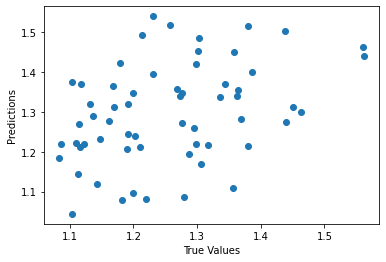

In [35]:
usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_t_12m_x, usdeu_12m_y, test_size = 0.3, random_state=35)
current = usdeu12m_x_train["12thCurrent_EUR_USD"]
TCNN_att_model = TCNN_att(seed=57)
TCNN_att_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=30, lr=0.001)
#TCNN_model.load_best_state_dict()
predictions = TCNN_att_model.predict(usdeu12m_x_valid)
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(predictions - usdeu12m_y_valid)
print(predictions)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
# print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
# print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / usdeu12m_y_valid)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
plt.scatter(usdeu12m_y_valid, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [36]:
# import random

# while accuracy < 96:
#     param = [random.randint(0,100),57]
#     usdeu12m_x_train, usdeu12m_x_valid, usdeu12m_y_train, usdeu12m_y_valid = train_test_split(usdeu_t_12m_x, usdeu_12m_y, test_size = 0.3, random_state=param[0])
#     current = usdeu12m_x_train["12thCurrent_EUR_USD"]
#     TCNN_model = TCNN(seed=param[1])
#     TCNN_model.fit(x=usdeu12m_x_train, y=usdeu12m_y_train, z=current, epochs=20, lr=0.001)
#     TCNN_model.load_best_state_dict()
#     predictions = TCNN_model.predict(usdeu12m_x_valid)
#     # Use the forest's predict method on the test data
#     # Calculate the absolute errors
#     errors = abs(predictions - usdeu12m_y_valid)
#     print(predictions)
#     # Print out the mean absolute error (mae)
#     # print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

#     # print('MAE:', metrics.mean_absolute_error(usdeu3m_y_test, predictions))
#     # print('MSE:', metrics.mean_squared_error(usdeu3m_y_test, predictions))
#     # print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu3m_y_test, predictions)))
#     # print ('R-squared: ',metrics.r2_score(usdeu3m_y_test, predictions)) 

#     # Calculate mean absolute percentage error (MAPE)
#     mape = 100 * (errors / usdeu12m_y_valid)
#     # Calculate and display accuracy
#     accuracy = 100 - np.mean(mape)
#     print('Accuracy:', round(accuracy, 2), '%.')
#     print(param)

### Performance Evaluation

In [37]:
# def accum_return_without_transaction_fee(current, pred, y_true):
#     rate = np.ones(len(pred))
#     rate[pred > current] = 1 + (y_true[pred > current] - current[pred > current])/current[pred > current]
#     rate[pred < current] = 1 - (y_true[pred < current] - current[pred < current])/current[pred < current]
#     return reduce(lambda a, b: a*b, rate), rate, [reduce(lambda a, b: a*b, rate[:i+1]) for i, r in enumerate(rate)]

#### Accumulated Return

In [38]:
def accum_return(current, pred, y_true):
    hold_signal = False
    short_signal = False
    profit = []
    for i, price in enumerate(pred.tolist()):
        if price > current[i]:
            if hold_signal:
                profit.append(1+ (y_true[i] - current[i])/current[i])
            else:
                if len(profit) > 0:
                    profit[-1] = 1+(current[i-1] - current[i]*1.002)/current[i-1]  ### Price is predicted up, buy back to close short pos and update the previous profit
                profit.append(1+ (y_true[i] - current[i]*1.002)/current[i]*1.002)  ### Start long position
                hold_signal = True
                short_signal = False
        elif price < current[i]:
            if short_signal:
                profit.append(1 + (current[i] - y_true[i])/current[i])
            else:
                if len(profit) > 0:
                    profit[-1] = 1+ (current[i]*0.998 - current[i-1])/current[i-1] ### Price is predicted down, sell all to close long pos and update the previous profit
                profit.append(1 + (current[i]*0.998 - y_true[i])/current[i]*0.998) ### Start short position
                short_signal = True
                hold_signal = False
    return reduce(lambda x,y: x*y, profit),  profit, [reduce(lambda x,y: x*y, profit[:k+1]) for k, rate in enumerate(profit)]

#### DMTest

In [39]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [40]:
n_month = 108

##### XGBoost

In [41]:
xgb_prediction = []
i = 0
while True:
    xgb_reg = xgb.XGBRegressor(n_estimators=2000, max_depth=3, learning_rate=0.1, reg_alpha=0.3, reg_lambda=0.3, subsample=0.6, random_state=38)
    xgb_reg.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    xgb_prediction.append(xgb_reg.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

[12:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[12:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[12:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[12:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[12:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[12:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[12:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Finish 1 month
[12:56

In [42]:
current = usdeu_y.iloc[-n_month-1:-1]
xgb_total_profit, xgb_profit, xgb_cum_profit = accum_return(current, np.array(xgb_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(xgb_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-3.8181184054521395, p_value=0.00022572805758159907)


In [43]:
xgb_cum_profit

[0.9993480414227827,
 1.0051264491406275,
 1.0720842684867027,
 1.0458850898912193,
 1.0752954447096454,
 1.0514368900602846,
 1.0279452969850726,
 1.0197908079282616,
 1.0177449313074178,
 1.001286712027073,
 0.9722254199153445,
 1.00780146708015,
 0.9875283993828774,
 1.0122293963966456,
 1.0231459756285979,
 1.021963757569213,
 0.9970325581569304,
 1.0030288447794349,
 0.9799672225730404,
 0.9757650860279246,
 0.9752622624411906,
 0.9641397806018569,
 0.9804140055934127,
 1.001305757914279,
 1.00155163774946,
 0.9945696497148984,
 1.0114960532147697,
 1.0069695137645385,
 1.0292534578684427,
 1.0489329623283967,
 1.0889478419542646,
 1.0981718301658787,
 1.1045723526091609,
 1.1337392012023668,
 1.0553202817220342,
 1.0446257213334136,
 1.0860093586314468,
 1.1336306311803934,
 1.1551563715913642,
 1.137045184926614,
 1.1194886682519025,
 1.0940760309637634,
 1.0881690096012808,
 1.0692806075656056,
 1.110076699093074,
 1.1390183178395694,
 1.1343328202031822,
 1.128308028466516,
 1

##### Elastic Net

In [44]:
ENet_prediction = []
i = 0
while True:
    ENet = ElasticNet()
    ENet.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    ENet_prediction.append(ENet.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [45]:
current = usdeu_y.iloc[-n_month-1:-1]
ENet_total_profit, ENet_profit, ENet_cum_profit = accum_return(current, np.array(ENet_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(ENet_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-7.114877850999157, p_value=1.3317598989375054e-10)


In [46]:
ENet_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.9725383606793991,
 0.9882655326910019,
 1.0149150009907768,
 1.0519008621700556,
 1.0688492280835125,
 1.0955842987990059,
 1.107348302078653,
 1.1064112429723476,
 1.0815786462815,
 1.088083404340628,
 1.063066209141751,
 1.0585077409966808,
 1.0579622791160141,
 1.045896636171199,
 1.0656032583717185,
 1.0407152160800974,
 1.0430527158408918,
 1.0357814166817365,
 1.053409195894031,
 1.0486950912098894,
 1.0719024102747883,
 1.090294555193906,
 1.0464336704427644,
 1.0375698006883805,
 1.0315224876783804,
 1.0022800014793385,
 0.9350968391353643,
 0.9274755679446792,
 0.8889550124700207,
 0.9297950852635833,
 0.910244867861391,
 0.9226708534983775,
 0.910244867861391,
 0.9290495261253641,
 0.925901609763994,
 0.9116531462335828,
 0.8751207484608422,
 0.8996413601178291,
 0.8977360423201579,
 0.9007182788730346,
 0.9408

##### SVM

In [47]:
SVR_prediction = []
i = 0
while True:
    svr = SVR()
    svr.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    SVR_prediction.append(svr.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [48]:
current = usdeu_y.iloc[-n_month-1:-1]
SVR_total_profit, SVR_profit, SVR_cum_profit = accum_return(current, np.array(SVR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(SVR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-7.237258153417014, p_value=7.281244069695706e-11)


In [49]:
SVR_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.9725383606793991,
 0.9882655326910019,
 1.0169488987883537,
 0.9777807513499334,
 0.9601064056607035,
 0.9860936851274947,
 0.9735119475182126,
 0.9743357517664393,
 0.9962040099920966,
 0.9902127063686289,
 1.0129796601378063,
 1.0173233552648204,
 1.0178475943318739,
 1.027396833612138,
 1.0447388078385085,
 1.067094688593771,
 1.0646979391845255,
 1.0721201309034796,
 1.0538739095943843,
 1.058590093915803,
 1.0351638013028548,
 1.015371290052311,
 0.9766367270190205,
 0.9683640758322697,
 0.962720117545982,
 0.9354281000794118,
 0.8727260429536656,
 0.8656131092230014,
 0.8296618680843183,
 0.8677779151410296,
 0.8495316938319345,
 0.8611288683928,
 0.8495316938319346,
 0.8670820846673777,
 0.864144133778625,
 0.8508460402821659,
 0.8167503470732213,
 0.8396354382066626,
 0.8378572047739966,
 0.8406405266686042,
 0.8

RandomForestRegressor

In [50]:
RFR_prediction = []
i = 0
while True:
    RFR = RandomForestRegressor()
    RFR.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    RFR_prediction.append(RFR.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [51]:
current = usdeu_y.iloc[-n_month-1:-1]
RFR_total_profit, RFR_profit, RFR_cum_profit = accum_return(current, np.array(RFR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(RFR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-2.9240220476256957, p_value=0.0042182723945514726)


In [52]:
RFR_cum_profit

[0.999349444394417,
 0.9895776281845411,
 1.0536523311604138,
 1.0773410554571827,
 1.0470461568993028,
 1.068137363157663,
 1.042188369182342,
 1.0339208926185997,
 1.0318466686056302,
 1.0151604064458286,
 0.9856964449674449,
 1.021765429071354,
 1.0012114604664948,
 1.0262547111827154,
 1.0373225490726954,
 1.036123950358404,
 1.0108473075901032,
 1.0169266779560038,
 0.9935455170046632,
 0.9892851562190451,
 0.9887753655761172,
 0.9774987721198375,
 0.9939984905906565,
 1.015179716230294,
 1.0154290029435011,
 1.0083502734189511,
 1.025511206896046,
 1.0209219483221585,
 1.0415179972857462,
 1.019476962631258,
 0.9805857756763918,
 0.9722796738716597,
 0.9666128941357213,
 0.9392105208920728,
 0.8762549268393849,
 0.8691132318297088,
 0.8330166211829765,
 0.8695442175981188,
 0.8860554008610377,
 0.8721633294887465,
 0.8586462424560202,
 0.876384929845674,
 0.8734154579478464,
 0.8599746904103114,
 0.8255131875960499,
 0.84864381080018,
 0.8468464988620213,
 0.8479603633996958,
 0.

##### Linear Regression

In [53]:
LR_prediction = []
i = 0
while True:
    LR = LinearRegression()
    LR.fit(usdeu_x.iloc[:-n_month + i].values, usdeu_y[:-n_month+i].values)
    print("Finish 1 month")
    LR_prediction.append(LR.predict([usdeu_x.iloc[-n_month+i].values])[0])
    i += 1
    if i == n_month:
        break

Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 month
Finish 1 m

In [54]:
current = usdeu_y.iloc[-n_month-1:-1]
LR_total_profit, LR_profit, LR_cum_profit = accum_return(current, np.array(LR_prediction), usdeu_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_y.iloc[-n_month:].values, current.values,np.array(LR_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-2.0834618131593667, p_value=0.03959154369992778)


In [55]:
LR_cum_profit

[0.9966559585772174,
 1.0044236608922676,
 1.0713346630755745,
 1.0451538030457295,
 1.0745435940318495,
 1.0507017213749332,
 1.027226553711233,
 1.0190777663042845,
 1.0170333201681803,
 0.9985196484739559,
 1.0254456282217785,
 1.062815249929295,
 1.0820266775475023,
 1.0527393720007798,
 1.066171453302225,
 1.0652692388252405,
 1.0413600445333904,
 1.0476229225639626,
 1.0213925743745325,
 1.0237342332172448,
 1.0242617758874832,
 1.0359430778713372,
 1.0143911510743653,
 0.9887218688990476,
 0.9909425889349751,
 0.9840345583970506,
 1.0007816670565806,
 0.9963030754865967,
 1.018350974396357,
 1.0378220214831797,
 1.077413038978274,
 1.0865393210532166,
 1.0928720452397942,
 1.1238537214339517,
 1.1991860107209122,
 1.2065808494730617,
 1.153950087674817,
 1.2069644752643878,
 1.1815863911444309,
 1.1977165293562677,
 1.1815863911444309,
 1.203584673637734,
 1.2052522914479706,
 1.223799611312787,
 1.2704910416082094,
 1.3034776265090329,
 1.3036309519656817,
 1.299300351774599,
 

##### LSTM

In [56]:
unSim_lstm_prediction = []
i = 0
while True:
    unSim_lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
    unSim_lstm_model.fit(x=usdeu_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_12m_x.iloc[:-n_month + i]["12thCurrent_EUR_USD"] , alpha=1, beta=0, epochs=20, lr=0.00001)
    unSim_lstm_model.load_best_state_dict()
    print("Finish 1 month")
    unSim_lstm_prediction.append(unSim_lstm_model.predict(usdeu_12m_x.iloc[-n_month+i])[0])
    i += 1
    if i == n_month:
        break

loss:  1.0426974058151246
loss:  0.4998561918735504
loss:  0.13283936493098736
loss:  0.13333704173564911
loss:  0.08915574699640275
loss:  0.07016684636473655
loss:  0.06617252305150031
loss:  0.061021721363067626
loss:  0.057006841897964476
loss:  0.05580434240400791
loss:  0.051190140470862386
loss:  0.04934447649866343
loss:  0.047255328856408596
loss:  0.04406237546354532
loss:  0.041331681236624715
loss:  0.042783153057098386
loss:  0.03821069244295359
loss:  0.03767755497246981
loss:  0.03477500043809414
loss:  0.03419347908347845
Finish 1 month
loss:  1.0047727227210999
loss:  0.4229024201631546
loss:  0.13446459377353842
loss:  0.11628169430927797
loss:  0.09474899552085182
loss:  0.06777476519346237
loss:  0.05877311697060412
loss:  0.05606371028856798
loss:  0.0551692782477899
loss:  0.050714443691752174
loss:  0.05373356965455142
loss:  0.054783459922129456
loss:  0.04963392645797946
loss:  0.05105200816284527
loss:  0.04645236005837267
loss:  0.05349882742898031
loss:  0.0

In [57]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
unSim_lstm_total_profit, unSim_lstm_profit, unSim_lstm_cum_profit = accum_return(current, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(unSim_lstm_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-4.698029128470485, p_value=7.848474473322778e-06)


In [58]:
unSim_lstm_cum_profit

[0.9966559585772174,
 1.0044236608922676,
 1.0713346630755745,
 1.0429587719995188,
 1.0114819599128888,
 1.0339246269363138,
 1.05491090462279,
 1.0444159440597673,
 1.0444224039657917,
 1.0591894075656185,
 1.0263948923638742,
 1.065926855594326,
 1.0831012101702162,
 1.110192764979923,
 1.1221658486749695,
 1.120868525505093,
 1.1460256054011335,
 1.1368549882351946,
 1.1083904505279463,
 1.1109169841942688,
 1.108128269832305,
 1.0954905035293097,
 1.1161315656865984,
 1.0900633931358992,
 1.09251173143377,
 1.084895645004488,
 1.1033592905097205,
 1.098421654480002,
 1.120581180206249,
 1.0968669777724365,
 1.0550235028722623,
 1.0460868725043606,
 1.037909939237641,
 1.0653165296521299,
 0.9916302964591168,
 0.9835482635680609,
 0.9426988581947894,
 0.9840359966833996,
 1.0028000130905779,
 1.0145072604343766,
 1.0008444763559823,
 1.0194777812820965,
 1.0208903111542726,
 1.0345901713824224,
 0.9909751194567269,
 1.0167044507483392,
 1.0168285898000602,
 1.0181754773658283,
 1.0

In [59]:
lstm_prediction = []
i = 0
while True:
    lstm_model = LSTM_model(hidden_size=250,  num_layers=3, middle_feature=250, seed=4)
    lstm_model.fit(x=usdeu_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_12m_x.iloc[:-n_month + i]["12thCurrent_EUR_USD"] , alpha=1, beta=1, epochs=20, lr=0.00001)
    lstm_model.load_best_state_dict()
    print("Finish 1 month")
    lstm_prediction.append(lstm_model.predict(usdeu_12m_x.iloc[-n_month+i])[0])
    i += 1
    if i == n_month:
        break

loss:  2.0612836956977842
loss:  1.5163750410079957
loss:  0.9006324410438538
loss:  1.1257188200950623
loss:  0.9598178267478943
loss:  0.8668454915285111
loss:  0.8408277422189713
loss:  0.8281182467937469
loss:  0.7896792620420456
loss:  0.6879510104656219
loss:  0.749448774755001
loss:  0.6044413059949875
loss:  0.6421564489603042
loss:  0.5714196503162384
loss:  0.5444288656115532
loss:  0.534064619243145
loss:  0.5049413636326789
loss:  0.5196147918701172
loss:  0.5324344336986542
loss:  0.5322237193584443
Finish 1 month
loss:  2.1182186170057817
loss:  1.530885468829762
loss:  0.9568706534125588
loss:  0.991155591878024
loss:  0.862343582240018
loss:  0.7108410759405657
loss:  0.7167115143754266
loss:  0.6346351937814192
loss:  0.6505699103528803
loss:  0.5693363113836809
loss:  0.606074720621109
loss:  0.6273187371817502
loss:  0.5961715917695652
loss:  0.5409958498044447
loss:  0.5505628910931674
loss:  0.6059564121744849
loss:  0.7025608989325437
loss:  0.5099319964647293
los

In [60]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
lstm_total_profit, lstm_profit, lstm_cum_profit = accum_return(current, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(lstm_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-3.5645410827425263, p_value=0.000546189642956632)


In [61]:
lstm_cum_profit

[0.9993480414227827,
 1.0051264491406275,
 1.0720842684867027,
 1.043688522997055,
 1.0123112559069394,
 0.9877806438950993,
 1.0079146318152092,
 1.0159102215216296,
 1.017948313015423,
 1.0344098212345234,
 1.0623036117473859,
 1.1011758348149117,
 1.0791084600124472,
 1.047804658250672,
 1.0591049056176431,
 1.0578804864865405,
 1.0816238455990748,
 1.0729685780738192,
 1.046103626197515,
 1.0484881794285459,
 1.0458561789407306,
 1.031813033785315,
 1.0103470290913152,
 0.9846816525394652,
 0.9805050670226584,
 0.9716951175663384,
 0.9532476956264272,
 0.9470876723695013,
 0.9680464486423584,
 0.986555664480169,
 1.024190963947508,
 1.0328664257225544,
 1.0388863258485221,
 1.0683375684621206,
 1.1399485915237604,
 1.1492394553100989,
 1.1969704616265686,
 1.1394757239036637,
 1.1131852559479227,
 1.1261248694927617,
 1.1390689357786246,
 1.1603652173974865,
 1.1541206625753013,
 1.169541985076008,
 1.214163332859546,
 1.2456874448376525,
 1.245839542586442,
 1.2474897772530162,
 1

##### TCNN

In [62]:
tcnn_prediction = []
i = 0
while True:
    TCNN_model = TCNN(seed=57)
    TCNN_model.fit(x=usdeu_t_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_t_12m_x.iloc[:-n_month+i]["12thCurrent_EUR_USD"], alpha=2, beta=0.2, epochs=20, lr=0.001)
    TCNN_model.load_best_state_dict()
    print("Finish 1 month")
    tcnn_prediction.append(TCNN_model.predict(usdeu_t_12m_x.iloc[-n_month + i])[0])
    i += 1
    if i == n_month:
        break

loss:  1.6178406655788422
loss:  0.39120468199253083
loss:  0.38597977459430693
loss:  0.36557089984416963
loss:  0.3791846051812172
loss:  0.36347292065620423
loss:  0.38117937445640565
loss:  0.38198259472846985
loss:  0.36165112555027007
loss:  0.377436663210392
loss:  0.3389264032244682
loss:  0.3622595608234406
loss:  0.35344205647706983
loss:  0.3428624540567398
loss:  0.35074086487293243
loss:  0.33951929956674576
loss:  0.3711327359080315
loss:  0.38246669322252275
loss:  0.3518760487437248
loss:  0.36034086495637896
Finish 1 month
loss:  1.4626461809331721
loss:  0.41041581468148663
loss:  0.37676254456693475
loss:  0.40310039574449713
loss:  0.39586361429908057
loss:  0.39105629379099066
loss:  0.3526879467747428
loss:  0.35729697617617523
loss:  0.3795715299519626
loss:  0.38287537748163397
loss:  0.36426265808669006
loss:  0.36586706611243164
loss:  0.4073439050804485
loss:  0.3416351757266305
loss:  0.3947422070936723
loss:  0.36942556364969775
loss:  0.345263500105251
los

In [63]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
tcnn_total_profit, tcnn_profit, tcnn_cum_profit = accum_return(current, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(tcnn_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-5.97529271792795, p_value=3.058753193831309e-08)


In [64]:
tcnn_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.97059328395804,
 0.9529249882872092,
 0.9786214670445671,
 1.0142847075049388,
 1.0326188979898627,
 1.0046689168976255,
 1.015503958709526,
 1.0143305707981622,
 0.9894904649427758,
 0.9815446967268829,
 1.004112355765226,
 1.0064011915003255,
 1.0038748412000194,
 0.9924260441736046,
 1.0111251817729763,
 0.9854400381697918,
 0.9812602359154419,
 0.9724747883545287,
 0.987113314522521,
 0.989561398702946,
 0.9676626911505801,
 0.9491608128225086,
 0.9129520587507752,
 0.905218851793339,
 0.89994292555135,
 0.8744305698880327,
 0.8158171975284001,
 0.8091680850042494,
 0.7755611575724008,
 0.8111917279463822,
 0.7941353088626912,
 0.8049762531955456,
 0.7941353088626912,
 0.808920188743838,
 0.8100487099451833,
 0.7959348082375131,
 0.7640395560400807,
 0.7854477071748653,
 0.7837842359718247,
 0.7848151541687003,
 0.74

TCNN with attention

In [65]:
tcnn_att_prediction = []
i = 0
while True:
    TCNN_att_model = TCNN_att(seed=57)
    TCNN_att_model.fit(x=usdeu_t_12m_x.iloc[:-n_month + i], y=usdeu_12m_y[:-n_month+i], z=usdeu_t_12m_x.iloc[:-n_month+i]["12thCurrent_EUR_USD"], alpha=2, beta=0.2, epochs=30, lr=0.001)
    TCNN_att_model.load_best_state_dict()
    print("Finish 1 month")
    tcnn_att_prediction.append(TCNN_att_model.predict(usdeu_t_12m_x.iloc[-n_month + i])[0])
    i += 1
    if i == n_month:
        break

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([9, 1])) that is different to the input size (torch.Size([9, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.419317427277565
loss:  0.4115291327238083
loss:  0.4151799023151398
loss:  0.4272075355052948
loss:  0.4074831247329712
loss:  0.4095646023750305
loss:  0.4120906203985214
loss:  0.40831505954265596
loss:  0.39671245515346526
loss:  0.42206854522228243
loss:  0.4065556973218918
loss:  0.40349680185317993
loss:  0.4345957815647125
loss:  0.3880407765507698
loss:  0.37200876176357267
loss:  0.3840039148926735
loss:  0.4162491738796234
loss:  0.4163689211010933
loss:  0.40575696527957916
loss:  0.3704350680112839
loss:  0.38543579280376433
loss:  0.3777232527732849
loss:  0.3912304788827896
loss:  0.39710321128368375
loss:  0.4079659044742584
loss:  0.38229180574417115
loss:  0.39112999439239504
loss:  0.420008447766304
loss:  0.355906642973423
loss:  0.3442261815071106
Finish 1 month


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4542519450187683
loss:  0.4307539029554887
loss:  0.41055275093425403
loss:  0.4544185427102176
loss:  0.373411319472573
loss:  0.4471316175027327
loss:  0.3691001453182914
loss:  0.40748530626296997
loss:  0.4541625421155583
loss:  0.43208910389380023
loss:  0.42622797055677936
loss:  0.4111963022838939
loss:  0.39486200430176477
loss:  0.4762723743915558
loss:  0.3912383670156652
loss:  0.3959399624304338
loss:  0.45580036260864953
loss:  0.41739479249173944
loss:  0.3739976476539265
loss:  0.37868535247716034
loss:  0.4009692750193856
loss:  0.4325944022698836
loss:  0.3908371925354004
loss:  0.3556320369243622
loss:  0.36468254978006537
loss:  0.375641866163774
loss:  0.36534230546517804
loss:  0.41487912698225543
loss:  0.3547702743248506
loss:  0.38018976016478107
Finish 1 month


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.41455152901736175
loss:  0.40519157458435406
loss:  0.43577040325511585
loss:  0.4224212332205339
loss:  0.4279871637170965
loss:  0.42880593646656384
loss:  0.39881299571557477
loss:  0.44653187827630475
loss:  0.35386754165996204
loss:  0.3961619463833896
loss:  0.35650189220905304
loss:  0.423235759139061
loss:  0.39216934550892224
loss:  0.43518700111996045
loss:  0.3798583366654136
loss:  0.3802184123884548
loss:  0.4083071865818717
loss:  0.3952887694944035
loss:  0.401162941347469
loss:  0.3818746351382949
loss:  0.38220077685334464
loss:  0.4440962076187134
loss:  0.38592458313161676
loss:  0.37720943039113825
loss:  0.36762582578442315
loss:  0.3704109191894531
loss:  0.40294940092346887
loss:  0.3816787979819558
loss:  0.34426469152623956
loss:  0.3973352015018463
Finish 1 month


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([3, 1])) that is different to the input size (torch.Size([3, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4160492474382574
loss:  0.3785793456164273
loss:  0.4309829419309443
loss:  0.44534771821715613
loss:  0.4418423988602378
loss:  0.39361869205128064
loss:  0.43224259398200293
loss:  0.36791339245709503
loss:  0.40473013845357025
loss:  0.3915907070040703
loss:  0.4201958640055223
loss:  0.42927727374163543
loss:  0.39547964659604157
loss:  0.4528274509039792
loss:  0.42168085412545636
loss:  0.41175091943957587
loss:  0.44484742934053595
loss:  0.4270959875800393
loss:  0.42991620573130523
loss:  0.43484900756315753
loss:  0.40228102694858203
loss:  0.4521527588367462
loss:  0.37216786498373206
loss:  0.39806882630694995
loss:  0.3869647275317799
loss:  0.3775494261221452
loss:  0.41755933382294397
loss:  0.42422026666727936
loss:  0.4056532166220925
loss:  0.39537896622310986
Finish 1 month


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.41236712444912305
loss:  0.4439139420335943
loss:  0.42987137220122595
loss:  0.4156839901750738
loss:  0.4343574345111847
loss:  0.4036918878555298
loss:  0.4373209503563968
loss:  0.4170839244669134
loss:  0.46564949507063086
loss:  0.4312896809794686
loss:  0.4145484810525721
loss:  0.41060931303284387
loss:  0.410888208584352
loss:  0.4230067757042972
loss:  0.38932089101184497
loss:  0.40929376537149603
loss:  0.40335918962955475
loss:  0.39431942863897845
loss:  0.35076200691136444
loss:  0.4127824753522873
loss:  0.4002049890431491
loss:  0.3829344456846064
loss:  0.40197806466709485
loss:  0.3634977530349385
loss:  0.3595475784756921
loss:  0.38055474107915704
loss:  0.3692991652271964
loss:  0.37876383553851733
loss:  0.3934919075532393
loss:  0.37570415708151733
Finish 1 month


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.45068592645905237
loss:  0.40718069672584534
loss:  0.41977298801595514
loss:  0.42619763992049475
loss:  0.4198830046437003
loss:  0.39847778190266003
loss:  0.4575113599950617
loss:  0.40769390626387164
loss:  0.3927986283193935
loss:  0.40126608176664874
loss:  0.4177115938880227
loss:  0.44266480478373443
loss:  0.37188791009512817
loss:  0.4263419942422347
loss:  0.3827748271551999
loss:  0.41574988581917505
loss:  0.37341407347809186
loss:  0.3671516234224493
loss:  0.3776236582886089
loss:  0.39509115435860376
loss:  0.3952338018200614
loss:  0.37724614956162195
loss:  0.37691941180012445
loss:  0.39834537560289557
loss:  0.3968695104122162
loss:  0.41610415415330365
loss:  0.3823196589946747
loss:  0.39686039090156555
loss:  0.3975267437371341
loss:  0.38266835700381885
Finish 1 month


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.44811819900165906
loss:  0.43969280611385
loss:  0.43433303995565936
loss:  0.399888740344481
loss:  0.4176544330336831
loss:  0.4076331013982946
loss:  0.3686090829697522
loss:  0.42037730325352063
loss:  0.40679186853495514
loss:  0.4222570142962716
loss:  0.4170582484115254
loss:  0.42510918053713714
loss:  0.39356095411560754
loss:  0.4169147285548123
loss:  0.39640825445001776
loss:  0.4090085408904336
loss:  0.43757307258519257
loss:  0.4038782092657956
loss:  0.3822533122517846
loss:  0.38323655453595246
loss:  0.42627446217970416
loss:  0.38528097488663415
loss:  0.3624746162783016
loss:  0.3909412053498355
loss:  0.4038090949708765
loss:  0.38351170041344385
loss:  0.3580718013373288
loss:  0.41980245980349457
loss:  0.38943984562700446
loss:  0.3911770961501382
Finish 1 month


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([7, 1])) that is different to the input size (torch.Size([7, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.45517999746582727
loss:  0.4085435149344531
loss:  0.4154419479045001
loss:  0.4414079731160944
loss:  0.4395472055131739
loss:  0.383937498385256
loss:  0.39208354462276807
loss:  0.39902700890194287
loss:  0.46355344219641254
loss:  0.4069026871161027
loss:  0.4081685624339364
loss:  0.3666476769880815
loss:  0.37616156989877875
loss:  0.39621790701692755
loss:  0.3859896023165096
loss:  0.40355813232335175
loss:  0.4226198304783214
loss:  0.3801835396073081
loss:  0.3725966919552196
loss:  0.3962736346504905
loss:  0.3747715272686698
loss:  0.4012472060593692
loss:  0.4069269841367548
loss:  0.3811221285299821
loss:  0.38233191587708215
loss:  0.4031177136031064
loss:  0.3939240005883304
loss:  0.4020271761850877
loss:  0.38080449537797406
loss:  0.4005773202939467
Finish 1 month


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.42709147930145264
loss:  0.42517362805930053
loss:  0.42609513889659534
loss:  0.4330737590789795
loss:  0.39665762131864374
loss:  0.43195655941963196
loss:  0.3825392777269537
loss:  0.38565117662603204
loss:  0.4377256089990789
loss:  0.39485951174389233
loss:  0.3943283530798825
loss:  0.4141484255140478
loss:  0.3869836818088185
loss:  0.43036225167187775
loss:  0.3666811097751964
loss:  0.38020029393109406
loss:  0.39714094319126825
loss:  0.3844505521384152
loss:  0.39486874775453046
loss:  0.4165319570086219
loss:  0.4001568474552848
loss:  0.3782782500440424
loss:  0.37973827665502374
loss:  0.3777339214628393
loss:  0.36697001348842273
loss:  0.3722944950515574
loss:  0.4023991687731309
loss:  0.3802888027646325
loss:  0.37896293672648346
loss:  0.3746610080653971
Finish 1 month
loss:  0.39662262120030145
loss:  0.40704893523996527
loss:  0.4239164184440266
loss:  0.4514046853238886
loss:  0.3969719111919403
loss:  0.4403263411738656
loss:  0.4107302346012809
loss:  

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4373352438211441
loss:  0.3692313849925995
loss:  0.3514393657445908
loss:  0.3951213866472244
loss:  0.4340297609567642
loss:  0.4197570770978928
loss:  0.4156172275543213
loss:  0.3952660173177719
loss:  0.3660015374422073
loss:  0.40074243247509
loss:  0.4169126182794571
loss:  0.3909579336643219
loss:  0.40508608520030975
loss:  0.3928918719291687
loss:  0.38926406800746916
loss:  0.39969740211963656
loss:  0.38948354721069334
loss:  0.4224215358495712
loss:  0.38288391977548597
loss:  0.3991574376821518
loss:  0.38425427973270415
loss:  0.379139831662178
loss:  0.3788802444934845
loss:  0.4087270587682724
loss:  0.37302047312259673
loss:  0.3667005091905594
loss:  0.3446099489927292
loss:  0.37137362360954285
loss:  0.3679410845041275
loss:  0.398677784204483
Finish 1 month
loss:  0.4693998098373413
loss:  0.4581155695698478
loss:  0.3615722195668654
loss:  0.4521162049336867
loss:  0.42148564620451495
loss:  0.4105090986598622
loss:  0.3774870363148776
loss:  0.378592315

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([11, 1])) that is different to the input size (torch.Size([11, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4182301640510559
loss:  0.38532028198242185
loss:  0.42776877284049986
loss:  0.4289816051721573
loss:  0.3959456533193588
loss:  0.42112266421318056
loss:  0.38926573693752287
loss:  0.40463574826717374
loss:  0.4139189839363098
loss:  0.4082111567258835
loss:  0.43196197748184206
loss:  0.3844764769077301
loss:  0.3880203038454056
loss:  0.35053863525390627
loss:  0.3745396018028259
loss:  0.4325519472360611
loss:  0.3838598608970642
loss:  0.3861939191818237
loss:  0.3753532707691193
loss:  0.3803199291229248
loss:  0.3481599271297455
loss:  0.37076314687728884
loss:  0.3986740201711655
loss:  0.3694172501564026
loss:  0.4041721850633621
loss:  0.3835688441991806
loss:  0.3739300757646561
loss:  0.36016626954078673
loss:  0.3792070925235748
loss:  0.3599914342164993
Finish 1 month
loss:  0.42022085189819336
loss:  0.3968082083897157
loss:  0.37138347598639404
loss:  0.4105182181705128
loss:  0.4208802011880008
loss:  0.43480958992784674
loss:  0.4173712676221674
loss:  0.34

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([12, 1])) that is different to the input size (torch.Size([12, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.40765367448329926
loss:  0.4033310741186142
loss:  0.397861522436142
loss:  0.4120811939239502
loss:  0.4031053274869919
loss:  0.4030037194490433
loss:  0.3823140561580658
loss:  0.3626042753458023
loss:  0.40510112047195435
loss:  0.42596069276332854
loss:  0.4215587586164474
loss:  0.42446149587631227
loss:  0.3926362872123718
loss:  0.3985378623008728
loss:  0.3882551372051239
loss:  0.38831388056278227
loss:  0.3830942302942276
loss:  0.38027290999889374
loss:  0.41670704782009127
loss:  0.38106899112463
loss:  0.34217851758003237
loss:  0.36390012204647065
loss:  0.34883977472782135
loss:  0.42883608043193816
loss:  0.380546310544014
loss:  0.4070040762424469
loss:  0.3874983251094818
loss:  0.37555133998394014
loss:  0.3881070792675018
loss:  0.39738756120204927
Finish 1 month
loss:  0.43066849491812964
loss:  0.40713449770754034
loss:  0.4208806482228366
loss:  0.38664309544996783
loss:  0.4257114367051558
loss:  0.4123011123050343
loss:  0.36582970890131866
loss:  0.3

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([13, 1])) that is different to the input size (torch.Size([13, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4391139805316925
loss:  0.4314480125904083
loss:  0.42277981638908385
loss:  0.42446076571941377
loss:  0.4154540091753006
loss:  0.42345563471317293
loss:  0.38426558673381805
loss:  0.38941311836242676
loss:  0.40257724821567537
loss:  0.40516995787620547
loss:  0.43735879361629487
loss:  0.40213313400745393
loss:  0.41783749759197236
loss:  0.3905587285757065
loss:  0.4117843329906464
loss:  0.3776194155216217
loss:  0.38895772993564603
loss:  0.3950435698032379
loss:  0.3668823838233948
loss:  0.3831138640642166
loss:  0.39414105415344236
loss:  0.396006190776825
loss:  0.4078322321176529
loss:  0.3993649184703827
loss:  0.41064406335353854
loss:  0.4053863972425461
loss:  0.38867880403995514
loss:  0.39844772815704343
loss:  0.37600624859333037
loss:  0.39633058607578275
Finish 1 month
loss:  0.46265463395552203
loss:  0.39534333077344025
loss:  0.43206171826882794
loss:  0.4713151156902313
loss:  0.41955868764357135
loss:  0.36208419637246564
loss:  0.37659102271903644
l

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([14, 1])) that is different to the input size (torch.Size([14, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.42582447826862335
loss:  0.41023336350917816
loss:  0.4192769527435303
loss:  0.44222247302532197
loss:  0.4347466051578522
loss:  0.4213789850473404
loss:  0.42826874554157257
loss:  0.4254381090402603
loss:  0.43190943002700805
loss:  0.4183142602443695
loss:  0.4196553438901901
loss:  0.43168399333953855
loss:  0.3904769986867905
loss:  0.3903770834207535
loss:  0.4211741626262665
loss:  0.41491144597530366
loss:  0.3878689855337143
loss:  0.42445471584796907
loss:  0.41676388382911683
loss:  0.39681088328361513
loss:  0.4106539100408554
loss:  0.42953126430511473
loss:  0.4264307200908661
loss:  0.41324527859687804
loss:  0.40807493031024933
loss:  0.4010625213384628
loss:  0.3951621115207672
loss:  0.42458488047122955
loss:  0.4126705676317215
loss:  0.402196416258812
Finish 1 month
loss:  0.4707882377234372
loss:  0.4163275957107544
loss:  0.4034270779653029
loss:  0.4092137271707708
loss:  0.3842721337621862
loss:  0.4241696135564284
loss:  0.39473707567561755
loss:  0.

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([15, 1])) that is different to the input size (torch.Size([15, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.47134642899036405
loss:  0.42214490473270416
loss:  0.43386961817741393
loss:  0.4374568909406662
loss:  0.4308697760105133
loss:  0.43561100363731386
loss:  0.42982577085494994
loss:  0.43702088892459867
loss:  0.417890202999115
loss:  0.44690189361572263
loss:  0.4413593351840973
loss:  0.44895256161689756
loss:  0.42288253605365755
loss:  0.44420835077762605
loss:  0.4241954356431961
loss:  0.44293647408485415
loss:  0.4119104236364365
loss:  0.4271535336971283
loss:  0.40543861985206603
loss:  0.4334726452827454
loss:  0.4223868817090988
loss:  0.40058832466602323
loss:  0.432197642326355
loss:  0.41904592514038086
loss:  0.4284760892391205
loss:  0.4301778942346573
loss:  0.4286092221736908
loss:  0.4177633374929428
loss:  0.3985062301158905
loss:  0.42214498817920687
Finish 1 month
loss:  0.49785206805575977
loss:  0.43583289872516284
loss:  0.4684701318090612
loss:  0.4782602136785334
loss:  0.46564302119341766
loss:  0.4572295681996779
loss:  0.4406422132795507
loss:  

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4477528274059296
loss:  0.43685964345932005
loss:  0.44820707440376284
loss:  0.42603989243507384
loss:  0.4503950119018555
loss:  0.44371919631958007
loss:  0.41756278574466704
loss:  0.4382079869508743
loss:  0.4376478433609009
loss:  0.42709018290042877
loss:  0.4380552232265472
loss:  0.45350231826305387
loss:  0.44408551752567293
loss:  0.43735301196575166
loss:  0.43514376878738403
loss:  0.4418718457221985
loss:  0.41211892664432526
loss:  0.4368749648332596
loss:  0.4011847019195557
loss:  0.40843588709831236
loss:  0.4006846696138382
loss:  0.45051953494548796
loss:  0.4308341294527054
loss:  0.4447208374738693
loss:  0.41124770045280457
loss:  0.4486378639936447
loss:  0.4362542390823364
loss:  0.41221543550491335
loss:  0.4007733851671219
loss:  0.42102062702178955
Finish 1 month
loss:  0.4961424713784998
loss:  0.43182716315442865
loss:  0.48033771731636743
loss:  0.40600772337480023
loss:  0.45263575694777747
loss:  0.4179407900029963
loss:  0.3900017657063224
los

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([17, 1])) that is different to the input size (torch.Size([17, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4444838583469391
loss:  0.4366991937160492
loss:  0.4208176970481873
loss:  0.4135490506887436
loss:  0.42507806420326233
loss:  0.4635311931371689
loss:  0.44832868576049806
loss:  0.4230020701885223
loss:  0.4428986370563507
loss:  0.42676731050014494
loss:  0.43669992983341216
loss:  0.43491295278072356
loss:  0.44066932499408723
loss:  0.4220145374536514
loss:  0.4380297392606735
loss:  0.4393882155418396
loss:  0.41787091791629793
loss:  0.41821759939193726
loss:  0.4361459851264954
loss:  0.43043995797634127
loss:  0.41743395030498504
loss:  0.4055492222309113
loss:  0.4418526440858841
loss:  0.4327236324548721
loss:  0.4400510281324387
loss:  0.4357229918241501
loss:  0.41257340312004087
loss:  0.4072154343128204
loss:  0.40807498395442965
loss:  0.4347575753927231
Finish 1 month
loss:  0.5215331261808221
loss:  0.45863098718903283
loss:  0.45800147273323755
loss:  0.4398757517337799
loss:  0.43038709326223895
loss:  0.4511407288638028
loss:  0.39085535298694263
loss:  

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([18, 1])) that is different to the input size (torch.Size([18, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4431984692811966
loss:  0.4340278685092926
loss:  0.43694798052310946
loss:  0.4362882196903229
loss:  0.44283829629421234
loss:  0.4471714377403259
loss:  0.44212558269500735
loss:  0.42076489627361296
loss:  0.44721026420593263
loss:  0.4349150747060776
loss:  0.42619369328022005
loss:  0.437918359041214
loss:  0.43912366926670077
loss:  0.41528316140174865
loss:  0.41500021517276764
loss:  0.42523431181907656
loss:  0.4246499389410019
loss:  0.43456854820251467
loss:  0.430208358168602
loss:  0.44114530086517334
loss:  0.421851310133934
loss:  0.4162164509296417
loss:  0.4432168811559677
loss:  0.42378456294536593
loss:  0.4174275755882263
loss:  0.43452940583229066
loss:  0.41958920657634735
loss:  0.42830988168716433
loss:  0.42155542075634
loss:  0.42041292786598206
Finish 1 month
loss:  0.5032173964110288
loss:  0.4592355652288957
loss:  0.47148433327674866
loss:  0.4173398586836728
loss:  0.4491846398873763
loss:  0.4628192836588079
loss:  0.447621153159575
loss:  0.41

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([19, 1])) that is different to the input size (torch.Size([19, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss:  0.4670687079429626
loss:  0.46565568447113037
loss:  0.43591868281364443
loss:  0.4362708032131195
loss:  0.4304331988096237
loss:  0.46386285722255705
loss:  0.4253178685903549
loss:  0.4238198012113571
loss:  0.4393590271472931
loss:  0.4319834589958191
loss:  0.4470231205224991
loss:  0.4400576651096344
loss:  0.4339193820953369
loss:  0.4263349145650864
loss:  0.44899224638938906
loss:  0.4461826354265213
loss:  0.4320398151874542
loss:  0.43967988193035124
loss:  0.43953915536403654
loss:  0.4389804482460022
loss:  0.43326458930969236
loss:  0.42004385590553284
loss:  0.42747917473316194
loss:  0.4432333707809448
loss:  0.44334696829319
loss:  0.44126072227954866
loss:  0.41406462490558626
loss:  0.4423999786376953
loss:  0.43273656964302065
loss:  0.4143410474061966
Finish 1 month
loss:  0.4137311415238814
loss:  0.39629147811369464
loss:  0.4781507280739871
loss:  0.47914148460734973
loss:  0.4355823478915475
loss:  0.40463078834793786
loss:  0.4390435110438954
loss:  0.4

In [66]:
current = usdeu_12m_y.iloc[-n_month-1:-1]
tcnn_att_total_profit, tcnn_att_profit, tcnn_att_cum_profit = accum_return(current, np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values)
dm_result = dm_test(usdeu_12m_y.iloc[-n_month:].values, current.values,np.array(tcnn_att_prediction), h = 1, crit="MSE")
print(dm_result)

dm_return(DM=-8.960852824314088, p_value=1.1392995824349367e-14)


In [67]:
tcnn_att_cum_profit

[0.999349444394417,
 0.991560749683909,
 0.9255066272351772,
 0.9481237984137679,
 0.9214624972893365,
 0.9419078209044203,
 0.9629522748818506,
 0.970591187001772,
 0.9725383606793991,
 0.9882655326910019,
 1.0149150009907768,
 1.0520531617546256,
 1.0308899211104392,
 1.0587931038425236,
 1.0452837819434164,
 1.0461683208772863,
 1.0696488089400202,
 1.063215798511874,
 1.085485915662552,
 1.0786739902889948,
 1.0781181364954124,
 1.0658226239388096,
 1.0838132073915978,
 1.1069083049337876,
 1.1071801164453328,
 1.0994617741914112,
 1.116011817590933,
 1.1187795756949084,
 1.0940213072581892,
 1.0731034302951528,
 1.0321664913948352,
 1.023423472507941,
 1.0174586091552003,
 0.9886148178741381,
 0.9223476373388934,
 0.914830275305302,
 0.8768349128529114,
 0.9171181680981342,
 0.8978345002728347,
 0.9100910688058639,
 0.8978345002728347,
 0.9163827739861523,
 0.9132777766244515,
 0.8992235780399115,
 0.8631892665528055,
 0.8873755617913166,
 0.8854962212829188,
 0.8884377977308457,


### Visualization Result

In [68]:
from matplotlib import pyplot as plt

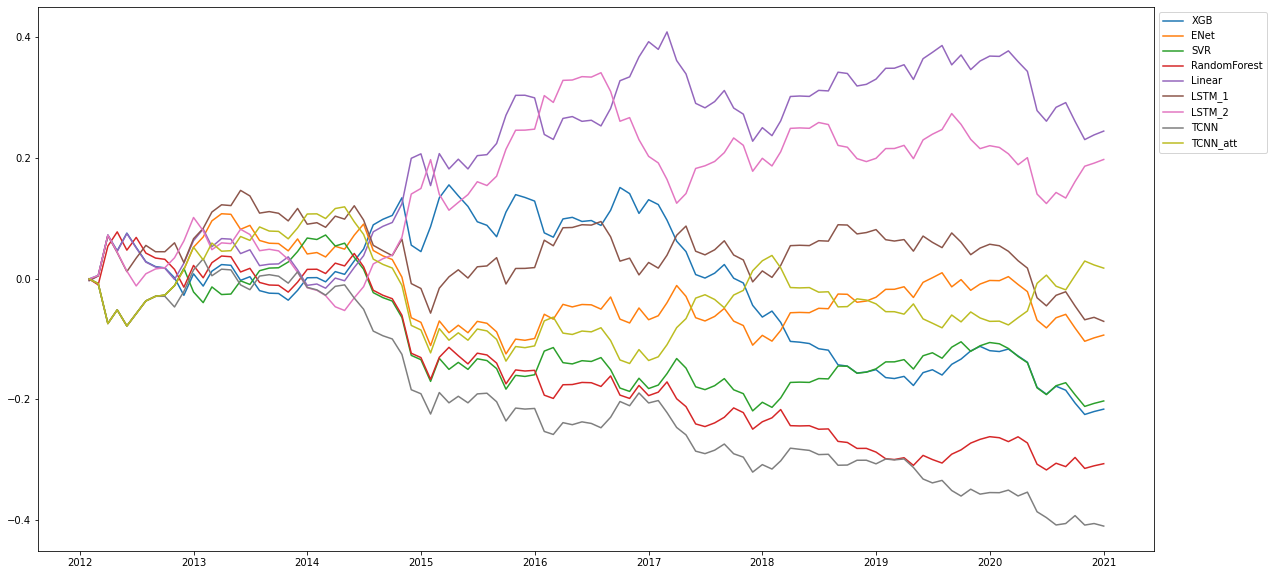

In [69]:
plt.figure(figsize = (20,10))
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(xgb_cum_profit) - 1, label="XGB")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(ENet_cum_profit) - 1, label="ENet")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(SVR_cum_profit) - 1, label="SVR")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(RFR_cum_profit) - 1, label="RandomForest")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(LR_cum_profit) - 1, label="Linear")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(unSim_lstm_cum_profit) - 1, label="LSTM_1")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(lstm_cum_profit) - 1, label="LSTM_2")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_cum_profit) - 1, label="TCNN")
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_att_cum_profit) - 1, label="TCNN_att")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

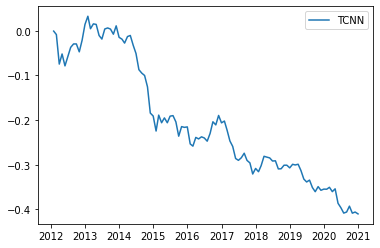

In [70]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_cum_profit) - 1, label="TCNN")
plt.legend()
plt.show()

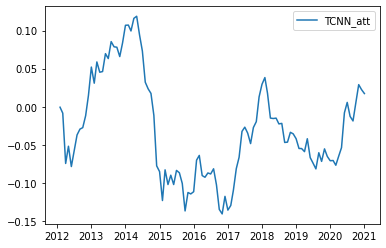

In [71]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(tcnn_att_cum_profit) - 1, label="TCNN_att")
plt.legend()
plt.show()

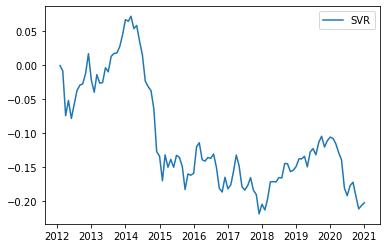

In [72]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(SVR_cum_profit) - 1, label="SVR")
plt.legend()
plt.show()

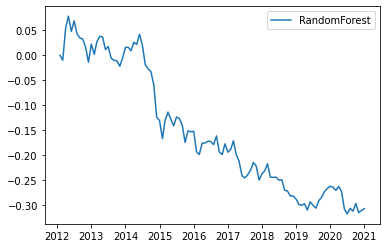

In [73]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(RFR_cum_profit) - 1, label="RandomForest")
plt.legend()
plt.show()

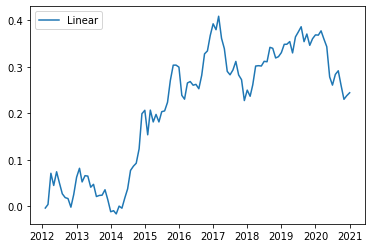

In [74]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(LR_cum_profit) - 1, label="Linear")
plt.legend()
plt.show()

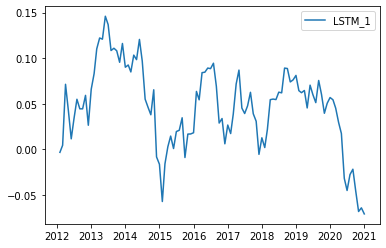

In [75]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(unSim_lstm_cum_profit) - 1, label="LSTM_1")
plt.legend()
plt.show()

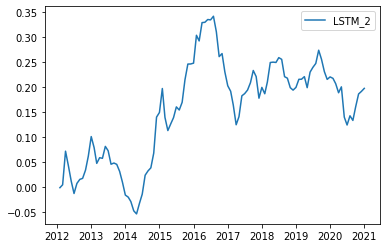

In [76]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(lstm_cum_profit) - 1, label="LSTM_2")
plt.legend()
plt.show()

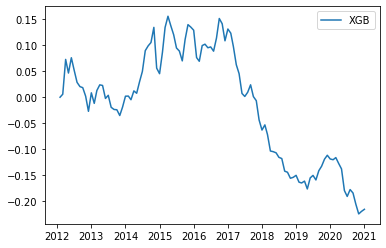

In [77]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(xgb_cum_profit) - 1, label="XGB")
plt.legend()
plt.show()

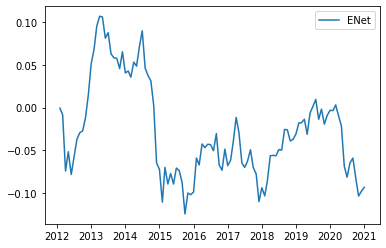

In [78]:
plt.plot(usdeu_12m_y.iloc[-n_month:].index, np.array(ENet_cum_profit) - 1, label="ENet")
plt.legend()
plt.show()

In [79]:
def classify_accuracy(current, prediction, y_true):
    go_up = (y_true > current)
    pred_go_up = (prediction > current)
    return (pred_go_up == go_up).sum()/len(go_up)

In [80]:
print("SVR accuracy: ",classify_accuracy(current.values, np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("RandomForest accuracy: ",classify_accuracy(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LinearRegression accuracy: ",classify_accuracy(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_1 accuracy: ",classify_accuracy(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_2 accuracy: ",classify_accuracy(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("XGboost accuracy: ",classify_accuracy(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN accuracy: ",classify_accuracy(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN with attention accuracy: ",classify_accuracy(current.values, np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("ElasticNet accuracy: ",classify_accuracy(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values))

SVR accuracy:  0.5092592592592593
RandomForest accuracy:  0.4537037037037037
LinearRegression accuracy:  0.5833333333333334
LSTM_1 accuracy:  0.5185185185185185
LSTM_2 accuracy:  0.5833333333333334
XGboost accuracy:  0.4537037037037037
TCNN accuracy:  0.4351851851851852
TCNN with attention accuracy:  0.49074074074074076
ElasticNet accuracy:  0.5185185185185185


In [81]:
print("SVR MAE: ",metrics.mean_absolute_error(usdeu_12m_y.iloc[-n_month:].values, np.array(SVR_prediction) ))
print('RandomForest MAE:', metrics.mean_absolute_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))

#print(current)
#print(RFR_prediction)
#print(usdeu_12m_y.iloc[-n_month:])
print("LinearRegression MAE: ",metrics.mean_absolute_error(current.values, np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_1 MAE: ",metrics.mean_absolute_error(current.values, np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("LSTM_2 MAE: ",metrics.mean_absolute_error(current.values, np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("XGboost MAE: ",metrics.mean_absolute_error(current.values, np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN MAE: ",metrics.mean_absolute_error(current.values, np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values))
print("TCNN_att MAE: ",metrics.mean_absolute_error(current.values, np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values))

print("ElasticNet MAE: ",metrics.mean_absolute_error(current.values, np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values))

print('RandomForest MSE:', metrics.mean_squared_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values))

print('RandomForest RMSE:', np.sqrt(metrics.mean_squared_error(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)))

print ('RandomForest R-squared: ',metrics.r2_score(current.values, np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)) 



SVR MAE:  0.06811700450610651
RandomForest MAE: 0.010848332766656274
LinearRegression MAE:  0.01615511161182348
LSTM_1 MAE:  0.025009361237982978
LSTM_2 MAE:  0.03466403862972958
XGboost MAE:  0.015820522810945627
TCNN MAE:  0.055247244740841216
TCNN_att MAE:  0.0883509214929589
ElasticNet MAE:  0.06532489058467786
RandomForest MSE: 0.00019965661334028854
RandomForest RMSE: 0.01412998985634061
RandomForest R-squared:  0.979218132300042


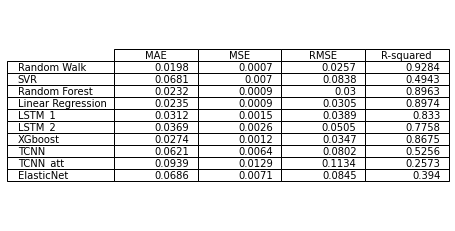

In [84]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[[metrics.mean_absolute_error(current.values, usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(current.values,  usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(current.values, usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(current.values, usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error(np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(SVR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error(np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(np.array(RFR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(LR_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(unSim_lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(np.array(lstm_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(xgb_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score(np.array(tcnn_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error(np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values)), -0.1*metrics.r2_score( np.array(tcnn_att_prediction), usdeu_12m_y.iloc[-n_month:].values)],
      [metrics.mean_absolute_error( np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values),metrics.mean_squared_error( np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values),np.sqrt(metrics.mean_squared_error( np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values)), metrics.r2_score( np.array(ENet_prediction), usdeu_12m_y.iloc[-n_month:].values)]]
column_labels=["MAE", "MSE", "RMSE", "R-squared"]
df=pd.DataFrame(data,columns=column_labels)
df=df.round(decimals=4)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Random Walk", "SVR","Random Forest","Linear Regression", "LSTM_1", "LSTM_2", "XGboost", "TCNN", "TCNN_att","ElasticNet"],loc="center")

plt.show()

In [ ]:
predict_df = pd.DataFrame()
predict_df["SVR_Prediction"] = SVR_prediction
predict_df["RandomForest_Prediction"] = RFR_prediction
predict_df["XGBoost_Prediction"] = xgb_prediction
predict_df["LSTM_1_Prediction"] = lstm_prediction
predict_df["LSTM_2_Prediction"] = unSim_lstm_prediction
predict_df["TCNN_Prediction"] = tcnn_prediction
predict_df["TCNN_att_Prediction"] = tcnn_att_prediction
predict_df.index = usdeu_12m_y.iloc[-n_month:].index
predict_df.to_csv("All_Prediction.csv")